In [7]:
# core import of the alignment calculation algorithm
from algorithm import calculate_oc_alignments

# imports to load object-centric event logs and discover accepting object-centric Petri net
from localocpa.objects.log.importer.ocel import factory as ocel_import_factory_json
from localocpa.algo.discovery.ocpn import algorithm as ocpn_discovery_factory

# some example accepting object-centric petri nets
from test_ocpns import TestOCPNS

# import for visualization
from visualization import alignment_viz


#  Loading Data

In [4]:
# load the object-centric event log
ocel_filename = "sample-logs/jsonocel/paper-example.jsonocel"
ocel = ocel_import_factory_json.apply(ocel_filename)

In [15]:
# discover a perfectly fitting accepting object centric petri net from the object-centric event log
discovered_ocpn = ocpn_discovery_factory.apply(ocel, parameters={"debug": False})

# load a predefined accepting object-centric Petri net that will detect deviations in the given object centric event log
ocpn = TestOCPNS().paper_example()[0]

      event_start_timestamp          concept:name  event_id  \
0 2021-03-01 09:00:00+01:00  receive sample order         0   
2 2021-03-04 09:00:00+01:00        setup envelope         1   
3 2021-03-05 09:00:00+01:00     add advertisement         2   

             time:timestamp case:concept:name  
0 2021-03-01 09:00:00+01:00                p1  
2 2021-03-04 09:00:00+01:00                p1  
3 2021-03-05 09:00:00+01:00                p1  
      event_start_timestamp          concept:name  event_id  \
1 2021-03-01 09:00:00+01:00  receive sample order         0   
4 2021-03-08 09:00:00+01:00   note product number         3   
5 2021-03-11 09:00:00+01:00           add product         4   

             time:timestamp case:concept:name  
1 2021-03-01 09:00:00+01:00                i1  
4 2021-03-08 09:00:00+01:00                i1  
5 2021-03-11 09:00:00+01:00                i1  


/Users/lukasliss/Documents/GitHub/oc-alignments/localocpa/objects/log/importer/csv/util.py:49: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  stream = df.to_dict('r')


# Compute alignments

In [16]:
# align all the process execution in the event log with an accepting oject-centric Petri net
alignments_discovered_ocpn = calculate_oc_alignments(ocel, discovered_ocpn)
alignments_ocpn = calculate_oc_alignments(ocel, ocpn)

# Visualize Alignments

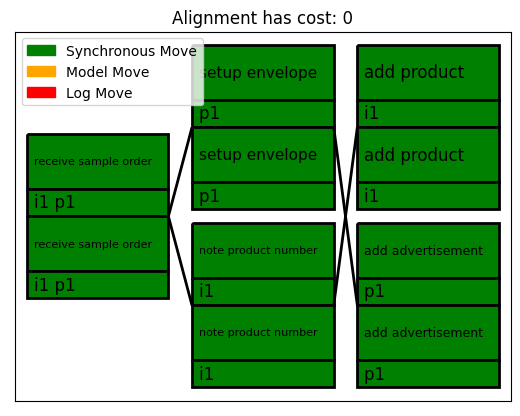

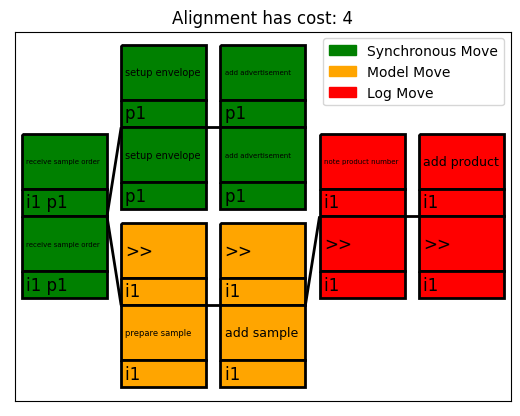

In [17]:
# visualize the alignment for the first process execution for both accepting object-centric Petri net
alignment_viz(next(iter(alignments_discovered_ocpn.values())))
alignment_viz(next(iter(alignments_ocpn.values())))